## Feature Selection

In [32]:
# libraries for this project
import json
import pandas as pd
import numpy as np
from IPython.display import HTML
import matplotlib.pyplot as plt
import seaborn as sns
import os.path
import sys
import gc
import feather
from icecream import ic
from sys import getsizeof
import time
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from datetime import datetime

plt.rcParams['figure.figsize'] = (20, 20)

# Pandas has a high consume of memory RAM usage
# release memory RAM
def release_memory(df):   
    del df
    gc.collect() 
    df = pd.DataFrame() # point to NULL
    print('memory RAM released.')

# Get start time 
start_time = time.time()

# datetime object containing current date and time
now = datetime.now()

# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print(">>> date: ", dt_string)

>>> date:  13/08/2021 09:19:16


In [33]:
print("Loading dataset - cleaned to feature select/engineering...")

# loading data feather format
df = pd.read_feather('../data/dataset_cleaning.ftr')
df.head()

Loading dataset - cleaned to feature select/engineering...


,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,policy_code,pub_rec_bankruptcies,fico_average
0,5000.0,0,162.87,1,1,4,24000.0,2,1,1,...,1.0,3.0,0.0,13648.0,83.7,9.0,109,1.0,0.0,737.0
1,2500.0,1,59.83,2,10,4,30000.0,1,0,0,...,5.0,3.0,0.0,1687.0,9.4,4.0,109,1.0,0.0,742.0
2,2400.0,0,84.33,2,1,4,12252.0,0,1,11,...,2.0,2.0,0.0,2956.0,98.5,10.0,109,1.0,0.0,737.0
3,10000.0,0,339.31,2,1,4,49200.0,1,1,9,...,1.0,10.0,0.0,5598.0,21.0,37.0,7,1.0,0.0,692.0
4,5000.0,0,156.46,0,3,4,36000.0,1,1,13,...,3.0,9.0,0.0,7963.0,28.3,12.0,44,1.0,0.0,732.0


In [34]:
df.shape

(38492, 25)

In [35]:
df.columns

Index(['loan_amnt', 'term', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'last_credit_pull_d',
       'policy_code', 'pub_rec_bankruptcies', 'fico_average'],
      dtype='object')

In [36]:
df = df.drop('policy_code',axis=1)

In [37]:
df.dtypes

loan_amnt               float64
term                      int64
installment             float64
grade                     int64
emp_length                int64
home_ownership            int64
annual_inc              float64
verification_status       int64
loan_status               int64
purpose                   int64
title                     int64
addr_state                int64
dti                     float64
delinq_2yrs             float64
earliest_cr_line          int64
inq_last_6mths          float64
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
last_credit_pull_d        int64
pub_rec_bankruptcies    float64
fico_average            float64
dtype: object

## Heatmap

<AxesSubplot:>

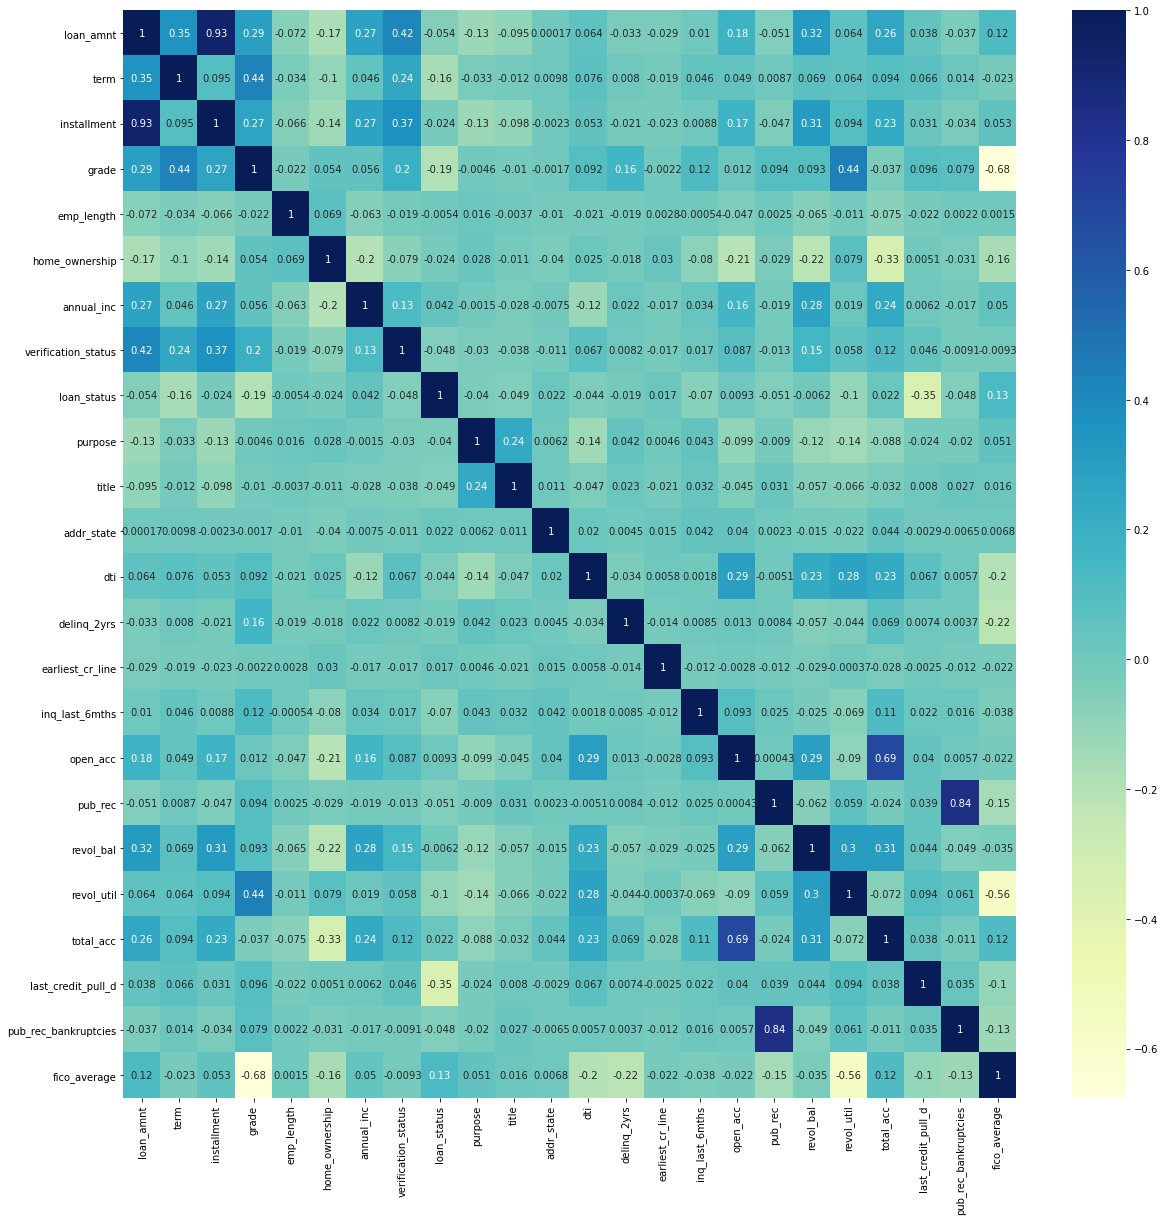

In [38]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')

In [ ]:
print("saving the file format feather...")
# this is important to do before save in feather format.
df = df.reset_index(drop=True) 
df.to_feather('../data/dataset_featuresel.ftr')

saving the file format feather...


In [ ]:
# time of execution in minutes
time_exec_min = round( (time.time() - start_time)/60, 4)

print(f'time of execution (preprocessing): {time_exec_min} minutes')
print("the preprocessing is done.")
print("The next step is to do the modeling.")

# datetime object containing current date and time
now = datetime.now()

# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print(">>> date: ", dt_string)

print("All Done. :)")

time of execution (preprocessing): 0.0973 minutes
the preprocessing is done.
The next step is to do the modeling.
>>> date:  13/08/2021 09:16:02
All Done. :)
